# Coursera Capstone Project
#### This notebook is for Capstone project that will completed in Course 9 in IBM Data Science Specialization

In [2]:
import pandas as pd
import numpy as np
print('Hello Capstone Project Course!')

Hello Capstone Project Course!


# Data Engineering

In [3]:
x = pd.read_csv('Data-Collisions.csv')

### Downsampling data

In [4]:
x['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [5]:
from sklearn.utils import resample
df_majority = x[x.SEVERITYCODE==1]
df_minority = x[x.SEVERITYCODE==2]
 
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=59000,     # to match minority class
                                 random_state=123) # reproducible results
 
x = pd.concat([df_majority_downsampled, df_minority])
 
x.SEVERITYCODE.value_counts()

1    59000
2    58188
Name: SEVERITYCODE, dtype: int64

### Dropping Nan and unknown values

In [6]:
x= x.dropna(axis = 0)

In [7]:
x = x.drop(x[x.LIGHTCOND == 'Unknown'].index)
x = x.drop(x[x.LIGHTCOND == 'nan'].index)
x = x.drop(x[x.ADDRTYPE == 'Unknown'].index)
x = x.drop(x[x.ADDRTYPE == 'nan'].index)
x = x.drop(x[x.ROADCOND == 'Unknown'].index)
x = x.drop(x[x.ROADCOND == 'nan'].index)
x = x.drop(x[x.WEATHER == 'Unknown'].index)
x = x.drop(x[x.WEATHER == 'nan'].index)

In [8]:
y = x['SEVERITYCODE']
x = x.drop('SEVERITYCODE', axis=1 )

In [26]:
x

,Alley,Block,Intersection,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,Other,Overcast,Partly Cloudy,Raining,...,Standing Water,Wet,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk,Other
25055,0,0,1,0,0,0,0,0,0,1,...,0,1,0,0,1,0,0,0,0,0
65280,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
155111,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
64598,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
119954,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194663,0,1,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
194666,0,1,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
194668,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
194670,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


### Creating dummy variables

In [10]:
dummy = pd.get_dummies(x['ADDRTYPE'])
x = (pd.concat([x,dummy],axis =1)).drop('ADDRTYPE',axis=1 )

In [11]:
dummy = pd.get_dummies(x['WEATHER'])
x = (pd.concat([x,dummy],axis =1)).drop('WEATHER',axis=1 )

In [12]:
dummy = pd.get_dummies(x['ROADCOND'])
x = (pd.concat([x,dummy],axis =1)).drop('ROADCOND',axis=1 )

In [13]:
dummy = pd.get_dummies(x['LIGHTCOND'])
x = (pd.concat([x,dummy],axis =1)).drop('LIGHTCOND',axis=1 )

In [14]:
x

,Alley,Block,Intersection,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,Other,Overcast,Partly Cloudy,Raining,...,Standing Water,Wet,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk,Other
25055,0,0,1,0,0,0,0,0,0,1,...,0,1,0,0,1,0,0,0,0,0
65280,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
155111,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
64598,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
119954,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194663,0,1,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
194666,0,1,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
194668,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
194670,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


# Training model

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

## Using Simple Random Forest Classifier

In [21]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 3000 , criterion = 'entropy',random_state = 0)
model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=3000, random_state=0)

In [22]:
y_pred = model.predict(X_test)


In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[10204,  4674],
       [ 8567,  8068]], dtype=int64)

In [24]:
model.score(X_test, y_test)

0.5798241995366992

## Using Grid search to find best parameters for Random Forest Classifier

In [38]:
from sklearn.model_selection import RandomizedSearchCV# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 300, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(30, 90, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 211, 222, 233, 244, 255, 266, 277, 288, 300], 'max_features': ['auto', 'sqrt'], 'max_depth': [30, 45, 60, 75, 90, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [39]:
from sklearn.ensemble import RandomForestClassifier
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf  = RandomForestClassifier()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.3min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [30, 45, 60, 75, 90, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 211, 222, 233,
                                                         244, 255, 266, 277,
                                                         288, 300]},
                   random_state=42, verbose=2)

## Finding accuracy of RFC with best parameters

In [53]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
print(rf_random.best_params_)
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 45, 'bootstrap': True}
Model Performance
Average Error: 0.4185 degrees.
Accuracy = 71.76%.


[[10297  4581]
 [ 8596  8039]]


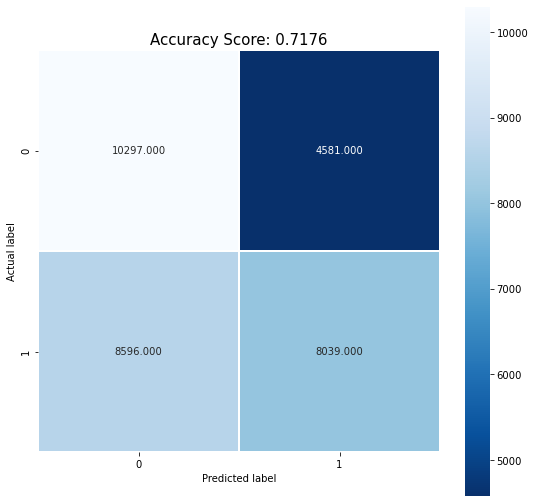

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: 0.7176'
plt.title(all_sample_title, size = 15);

## Using KNN algo for prediction

In [46]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5728112207660331


In [50]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=20)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.576841303588995


In [49]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=7)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5495192460254498


## Using Logistic Regression

c:\users\rohan\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.581855107415987
[[10297  4581]
 [ 8596  8039]]


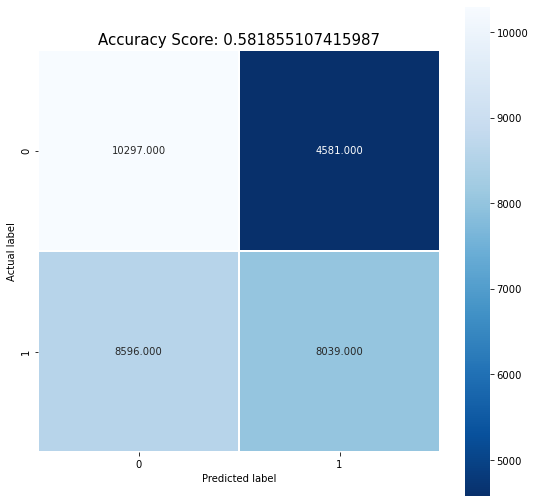

In [47]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)
score = logisticRegr.score(X_test, y_test)
print(score)
predictions = logisticRegr.predict(X_test)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);